<a href="https://colab.research.google.com/github/Tamajit1998/MNIST-Dataset-using-keras/blob/master/MNIST_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.layers.core import Dense,Dropout,Activation
from keras import Sequential
import numpy as np
from keras.utils import np_utils
import pandas as pd


In [0]:

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
x_train.shape[0]

60000

In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [0]:
nb_classes = 10 #Digits from 0 to 9

In [0]:
x_train =  x_train.reshape(60000,784)
x_test  =  x_test.reshape(10000,784)
x_train =  x_train.astype('float32')
x_test  =  x_test.astype('float32')
x_train /=255
x_test/=255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

60000 train samples
10000 test samples


In [0]:
Y_train = np_utils.to_categorical(y_train,nb_classes)   
y_test = np_utils.to_categorical(y_test, nb_classes)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
model=Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


W0703 15:28:15.199109 139673559558016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 15:28:15.237575 139673559558016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 15:28:15.243952 139673559558016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


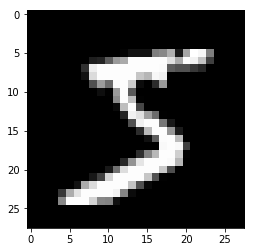

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28,28),cmap='gray')

In [0]:
from keras.optimizers import SGD,Adam,RMSprop,Adamax
model.compile(loss='categorical_crossentropy',optimizer=Adamax(),metrics=['accuracy'])

W0703 15:28:30.269428 139673559558016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0703 15:28:30.281898 139673559558016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
batch_size=128
nb_epoch=300

history=model.fit(x_train,Y_train,batch_size=batch_size,nb_epoch=nb_epoch,verbose=1,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/300
 5760/60000 [=>............................] - ETA: 1s - loss: 1.4187e-07 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


60000/60000 [==============================] - 2s 30us/step - loss: 2.6878e-04 - acc: 1.0000 - val_loss: 0.1162 - val_acc: 0.9838
Epoch 2/300
60000/60000 [==============================] - 2s 28us/step - loss: 2.6877e-04 - acc: 1.0000 - val_loss: 0.1166 - val_acc: 0.9839
Epoch 3/300
60000/60000 [==============================] - 2s 27us/step - loss: 2.6877e-04 - acc: 1.0000 - val_loss: 0.1164 - val_acc: 0.9838
Epoch 4/300
60000/60000 [==============================] - 2s 27us/step - loss: 2.6877e-04 - acc: 1.0000 - val_loss: 0.1177 - val_acc: 0.9839
Epoch 5/300
60000/60000 [==============================] - 2s 27us/step - loss: 2.6876e-04 - acc: 1.0000 - val_loss: 0.1184 - val_acc: 0.9838
Epoch 6/300
60000/60000 [==============================] - 2s 27us/step - loss: 2.6876e-04 - acc: 1.0000 - val_loss: 0.1185 - val_acc: 0.9838
Epoch 7/300
60000/60000 [==============================] - 2s 27us/step - loss: 2.6876e-04 - acc: 1.0000 - val_loss: 0.1194 - val_acc: 0.9837
Epoch 8/300
60000/

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model.png')